In this notebook we want to find the zeros of a function, meaning we want to find x such that f(x)=0, whenever we want to take a look at roots or zeros it's a good idea to visualize the function in the neiborhood we are looking for zeros in. Let us consider one particular example. Let 

\begin{equation}
f(x)=e^{x^{2}} cos(4x)
\end{equation}

Let us go and try to find the zeros of said function, as a first step let us define the function, our region of interest (where we'll look for zeros) and plot it

In [47]:
function x =f(x)
% This function calculates e^{x^{2}} cos(4x), the input x can be a scalar or an array
    x=exp(x.^2).*cos(4*x);
endfunction

In [48]:
x=-0:0.01:2;# We define the interval where will be looking for zeros 

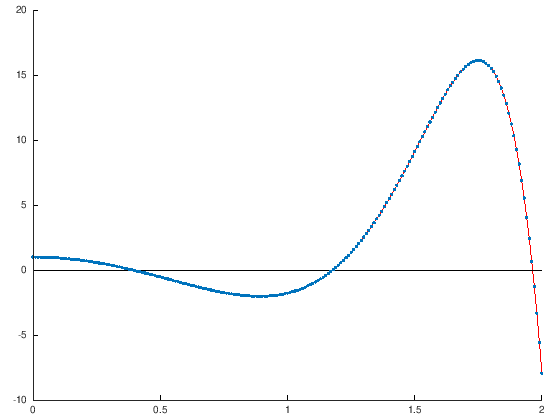

In [49]:
y=f(x);
hold on,plot(x,y,'r')
line("xdata",[0,2], "ydata",[0,0], "linewidth", 3)
plot(x,y,'.')

From the plot we can tell that there seems to be 3 zeros in this region, one around 0.4, one around 1.2 and one around 2  A brute force algorithm is to run through all points in our region of interest and check if one point is below the x axis and if the next point is above the x axis, or the other way around. if that happens then y is zero between those 2 points

At each stage we want to check if $y_{i}<0$ and $y_{i+1}>0$ (or the other way around). for both checks is $y_{i}y_{i+1}<0$. If so, then y is 0 between $x_i$ and $x_{i+1}$. Assuming a linear variation of the funcion f between $x_{i}$ and $x_{i+1}$, we have the approximation

$f(x)\approx \frac{y_{i+1}−y_{i}}{x_{i+1}−x_{i}}(x−xi)+ y_i$

We may solve for x when $f(x)=0$ such that we obtain:

$x=x_{i}− \frac{x_{i+1}−x_{i}}{y_{i+1}−y_{i}} yi$

Then for the algorithm we simply check whether the condition is fulfilled, if it is then we compute x using our grid and stop searching for roots. A naive implementation of the method can be found below

In [50]:
x = linspace(0, 0.5, 100001);
y = f(x);

root = NaN;  % Initialization value
for i = 1:(length(x)-1) 
    if y(i)*y(i+1) < 0
         root = x(i) - (x(i+1) - x(i))/(y(i+1) - y(i))*y(i);
         break;  % Jump out of loop
    end
end
if isnan(root)
    fprintf('Could not find any root in the interval [%g, %g]\n', x(1), x(end));
else
    fprintf('Found a root at x=%g\n', root);
end

Found a root at x=0.392699


In [57]:
function all_roots = brute_force(f,a, b, n)
    x = linspace(a, b, n);
    y = f(x);
    roots = [];
    for i = 1:(n-1)
        if y(i)*y(i+1) < 0
            root = x(i) - (x(i+1) - x(i))/(y(i+1) - y(i))*y(i);
            roots = [roots; root];
        end
    end
    if isempty(roots)
    fprintf('Could not find any root in the interval [%g, %g]\n', x(1), x(end));
    else
    fprintf('Found a root at x=%g\n', roots);
    end
    all_roots = roots;
end

In [59]:
brute_force(@f,0,2, 10000)

Found a root at x=0.392699
Found a root at x=1.1781
Found a root at x=1.9635
ans =

   0.39270
   1.17810
   1.96350



In [60]:
function result =f2(x)
    result=x.^2 .- 9;
end

In [62]:
brute_force(@f2,0,4, 10000)

Found a root at x=3
ans =  3.0000


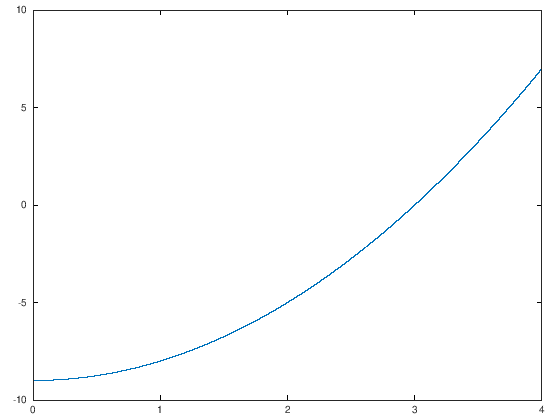

In [157]:
plot(x,f2(x))

In [161]:
roots=brute_force(0,4,100001)

roots =  3


In [70]:
f(roots(3))

ans =  0.000000052503


In [162]:
function result = dfdx(x)
    result=2*x;
end

In [163]:
function x =f(x)
    x=x.^2 .-9;
endfunction

In [175]:
function [result,c] = naive_Newton(starting_value,eps)
    x = starting_value;
    c=0;
    while abs(f(x)) > eps
        x = x - f(x)/df(x);
        c+=1;
    end
    result = x;
end

In [173]:
function y=f(x)
y=x^2 + 1;
endfunction

In [174]:
function yprime = df(x)
yprime = 2 * x; #exp(x^2) * (x * cos (4 * x) - 2 * sin (4 * x));
endfunction

In [ ]:
[result,c]=naive_Newton(0.1,eps=0.000001)

In [172]:
f(result)

ans =  0.00000012098


In [143]:
function [result1, result2] = bisection(f, x_L, x_R, eps)
    if f(x_L)*f(x_R) > 0
        fprintf('Error! Function does not have opposite\n');
        fprintf('signs at interval endpoints!')
        exit(1)
    end
    x_M = (x_L + x_R)/2.0;
    f_M = f(x_M);
    iteration_counter = 1;
    while abs(f_M) > eps
        left_f = f(x_L);
        right_f = f(x_R);
        if left_f*f_M > 0   % i.e., same sign
            x_L = x_M;
        else
            x_R = x_M;
        end
        x_M = (x_L + x_R)/2;
        f_M = f(x_M);
        iteration_counter = iteration_counter + 1;
    end
    result1 = x_M;
    result2 = iteration_counter;
end
function bisection_method()
    f = @(x) x^2 - 9;
    eps = 1e-6;
    a = 0;   b = 1000;
    [solution, no_iterations] = bisection(f, a, b, eps);
    if solution <= b   % Solution found
        fprintf('Number of function calls: %d\n', 1+2*no_iterations);
        fprintf('A solution is: %f\n', solution);
    else
        fprintf('Abort execution.\n');
    end
end

In [144]:
bisection_method()

Number of function calls: 63
A solution is: 3.000000
